# Part 1

### 2 - Solving GM with ChatGPT and Python

Data saved to glosten_milgrom_simulation_results.csv


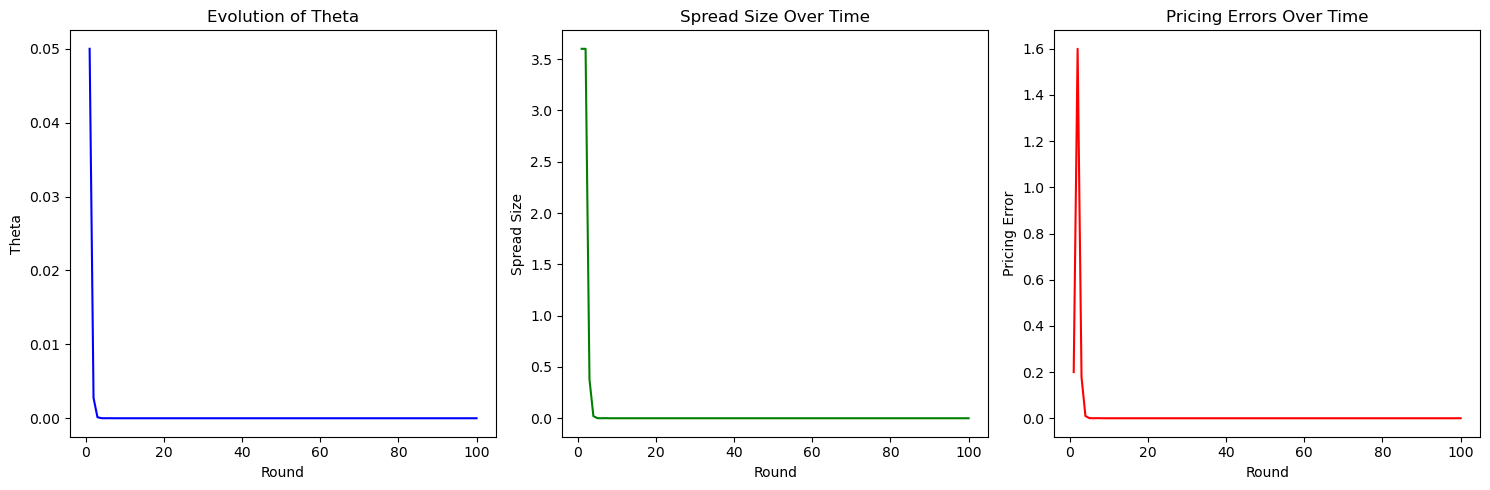

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go


def run_simulation(pi, V_high=102, V_low=98, periods=100, initial_theta=0.5):
    # Create a DataFrame to store results
    results = pd.DataFrame(index=range(1, periods + 1),
                           columns=['Theta', 'mu_t', 'Sb', 'Sa', 'Bid',
                                    'Ask', 'Trader Type', 'Trade', 'Price',
                                    'Spread Size', 'Pricing Error'])
    theta = initial_theta

    for round in range(1, periods + 1):
        # Calculate expected value and bid/ask spreads
        mu_t = theta * V_high + (1 - theta) * V_low
        Sb = (pi * theta * (1 - theta) / (pi * theta + (1 - pi) / 2)) * (V_high - V_low)
        Sa = Sb  # Same calculation for both spreads in this case
        bid = mu_t - Sb
        ask = mu_t + Sa

        # Simulate trader arrival
        trader_type = 'I' if np.random.rand() < pi else 'U'

        trade = -1 if trader_type == 'I' else (1 if np.random.rand() < 0.5 else -1)
        
        # Determine trade price
        price = ask if trade == 1 else bid

        # Update the market maker's belief (theta)
        if trade == 1:
            theta = ((1 + pi) / 2 * theta) / (pi * theta + (1 - pi) / 2)
        else:
            theta = ((1 - pi) / 2 * theta) / (pi * (1 - theta) + (1 - pi) / 2)

        # Record the results
        spread_size = ask - bid
        pricing_error = abs(price - V_low)  # Adjusted to use V_low as the "true value"
        results.loc[round] = [theta, mu_t, Sb, Sa, bid, ask, trader_type, trade, price, spread_size, pricing_error]

    return results


# Parameters for the simulation
pi = 0.9  # Probability of encountering an informed trader
V_high = 102
V_low = 98
periods = 100  # Define periods globally

# Run the simulation
simulation_results = run_simulation(pi, V_high, V_low, periods)

# Save the results to CSV
csv_filename = 'glosten_milgrom_simulation_results.csv'
simulation_results.to_csv(csv_filename, index_label='Round')
print(f"Data saved to {csv_filename}")

# Plotting the results
plt.figure(figsize=(15, 5))

# Plot for Theta (Belief in High Value)
plt.subplot(1, 3, 1)
plt.plot(simulation_results.index, simulation_results['Theta'], color='blue')
plt.title('Evolution of Theta')
plt.xlabel('Round')
plt.ylabel('Theta')

# Plot for Spread Size
plt.subplot(1, 3, 2)
plt.plot(simulation_results.index, simulation_results['Spread Size'], color='green')
plt.title('Spread Size Over Time')
plt.xlabel('Round')
plt.ylabel('Spread Size')

# Plot for Pricing Error
plt.subplot(1, 3, 3)
plt.plot(simulation_results.index, simulation_results['Pricing Error'], color='red')
plt.title('Pricing Errors Over Time')
plt.xlabel('Round')
plt.ylabel('Pricing Error')

plt.tight_layout()
plt.show()

Additional Analysis

In [ ]:
# Additional analysis with varying informed trader probabilities
informed_traders_range = np.linspace(0.1, 0.9, 10)
periods_range = list(range(1, periods + 1))

# Create matrices to store the results for 3D plotting
spread_matrix = np.zeros((len(informed_traders_range), periods))
pricing_error_matrix = np.zeros((len(informed_traders_range), periods))

# Loop over different proportions of informed traders
for idx, pi in enumerate(informed_traders_range):
    sim_results = run_simulation(pi, V_high, V_low, periods)
    spread_matrix[idx, :] = sim_results['Spread Size']
    pricing_error_matrix[idx, :] = sim_results['Pricing Error']

# Create 3D interactive plot for spread size
spread_fig = go.Figure(data=[go.Surface(
    z=spread_matrix,
    x=periods_range,
    y=informed_traders_range,
    colorscale='Viridis'
)])
spread_fig.update_layout(
    title='Spread Size over Time and Proportion of Informed Traders',
    scene=dict(
        xaxis_title='Periods',
        yaxis_title='Proportion of Informed Traders',
        zaxis_title='Spread Size'
    )
)
spread_fig.show()

# Create 3D interactive plot for pricing errors
pricing_error_fig = go.Figure(data=[go.Surface(
    z=pricing_error_matrix,
    x=periods_range,
    y=informed_traders_range,
    colorscale='Plasma'
)])
pricing_error_fig.update_layout(
    title='Pricing Error over Time and Proportion of Informed Traders',
    scene=dict(
        xaxis_title='Periods',
        yaxis_title='Proportion of Informed Traders',
        zaxis_title='Pricing Error'
    )
)
pricing_error_fig.show()

# Part 3: Simulate adverse selection with spread adjustment factors
informed_traders_range_adverse = np.linspace(0.1, 0.9, 10)
spread_adjustment_range = np.linspace(0.8, 1.2, 5).tolist()

# Create matrices for adverse selection results
spread_matrix_adverse = np.zeros((len(informed_traders_range_adverse), len(spread_adjustment_range)))
pricing_error_matrix_adverse = np.zeros((len(informed_traders_range_adverse), len(spread_adjustment_range)))

# Loop over different proportions of informed traders and spread adjustments
for idx, pi in enumerate(informed_traders_range_adverse):
    for jdx, spread_factor in enumerate(spread_adjustment_range):
        sim_results = run_simulation(pi, V_high, V_low, periods)
        adjusted_spread = sim_results['Spread Size'] * spread_factor
        adjusted_error = sim_results['Pricing Error']
        spread_matrix_adverse[idx, jdx] = adjusted_spread.mean()
        pricing_error_matrix_adverse[idx, jdx] = adjusted_error.mean()

# Create 3D interactive plot for spread size under adverse selection scenarios
spread_adverse_fig = go.Figure(data=[go.Surface(
    z=spread_matrix_adverse,
    x=spread_adjustment_range,
    y=informed_traders_range_adverse,
    colorscale='Viridis'
)])
spread_adverse_fig.update_layout(
    title='Adverse Selection: Spread Size under Modified Bid-Ask Spread',
    scene=dict(
        xaxis_title='Spread Adjustment Factor',
        yaxis_title='Proportion of Informed Traders',
        zaxis_title='Average Spread Size'
    )
)
spread_adverse_fig.show()

# Create 3D interactive plot for pricing errors under adverse selection scenarios
pricing_error_adverse_fig = go.Figure(data=[go.Surface(
    z=pricing_error_matrix_adverse,
    x=spread_adjustment_range,
    y=informed_traders_range_adverse,
    colorscale='Plasma'
)])
pricing_error_adverse_fig.update_layout(
    title='Adverse Selection: Pricing Error under Modified Bid-Ask Spread',
    scene=dict(
        xaxis_title='Spread Adjustment Factor',
        yaxis_title='Proportion of Informed Traders',
        zaxis_title='Average Pricing Error'
    )
)
pricing_error_adverse_fig.show()


# Part 2

### 1 - Tick size and stock returns

In [8]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import os


directory = os.getcwd()
filepath = os.path.join(directory, 'data/data1.xlsx')

dict = pd.read_excel(filepath, sheet_name=None)
for df in dict.values():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

df_eur = dict["Eurotunnel"]
df_lor = dict["L'Oréal"]

1.

In [9]:

print(f"Eurotunnel:\n{df_eur.loc[:, df_eur.columns != 'nb_trades'].describe().loc[['min', 'max', 'mean']]}\n")
print(  f"L\'Oréal:\n{df_lor.loc[:, df_lor.columns != 'nb_trades'].describe().loc[['min', 'max', 'mean']]}\n")

Eurotunnel:
          open     close       min       max
min   0.650000  0.630000  0.550000  0.660000
max   1.620000  1.610000  1.570000  1.650000
mean  1.171877  1.170197  1.152848  1.189003

L'Oréal:
          open      close        min        max
min   67.00000  66.850000  64.000000  70.250000
max   93.40000  93.500000  91.250000  95.300000
mean  80.81025  80.774875  79.231125  82.222625



2.

In [10]:
df_eur['return(t)'] = df_eur['close'].pct_change()
df_lor['return(t)'] = df_lor['close'].pct_change()
df_eur['return(t-1)'] = df_eur['return(t)'].shift(1)
df_lor['return(t-1)'] = df_lor['return(t)'].shift(1)

3.

In [11]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Eurotunnel Returns', 'L\'Oréal Returns'))

# Eurotunnel Returns subplot
scatter_euro = go.Scatter(
    x=df_eur['return(t)'],
    y=df_eur['return(t-1)'],
    mode='markers',
    marker={
        'size': 5,
        'color': df_eur['return(t-1)'],
        'colorscale': 'Viridis',
        'opacity': 0.8})
fig.add_trace(scatter_euro, row=1, col=1)

scatter_loreal = go.Scatter(
    x=df_lor['return(t)'],
    y=df_lor['return(t-1)'],
    mode='markers',
    marker={
        'size': 5,
        'color': df_lor['return(t-1)'],
        'colorscale': 'Viridis',
        'opacity': 0.8})
fig.add_trace(scatter_loreal, row=1, col=2)

fig.update_xaxes(title_text='Return(t)', row=1, col=1)
fig.update_xaxes(title_text='Return(t)', row=1, col=2)
fig.update_yaxes(title_text='Return(t-1)', row=1, col=1)
fig.update_yaxes(title_text='Return(t-1)', row=1, col=2)

fig.update_layout(
    title_text='Scatter Plot of Return Data - Eurotunnel and L\'Oréal - Default Scale',
    showlegend=False)

fig.show()

In [12]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Eurotunnel Returns', 'L\'Oréal Returns'))

# Eurotunnel Returns subplot
scatter_euro = go.Scatter(
    x=df_eur['return(t)'],
    y=df_eur['return(t-1)'],
    mode='markers',
    marker={
        'size': 5,
        'color': df_eur['return(t-1)'],
        'colorscale': 'Viridis',
        'opacity': 0.8})
fig.add_trace(scatter_euro, row=1, col=1)

scatter_loreal = go.Scatter(
    x=df_lor['return(t)'],
    y=df_lor['return(t-1)'],
    mode='markers',
    marker={
        'size': 5,
        'color': df_lor['return(t-1)'],
        'colorscale': 'Viridis',
        'opacity': 0.8})
fig.add_trace(scatter_loreal, row=1, col=2)

fig.update_xaxes(title_text='Return(t)', row=1, col=1, range=[-0.05, 0.05])
fig.update_xaxes(title_text='Return(t)', row=1, col=2, range=[-0.05, 0.05])
fig.update_yaxes(title_text='Return(t-1)', row=1, col=1, range=[-0.05, 0.05])
fig.update_yaxes(title_text='Return(t-1)', row=1, col=2, range=[-0.05, 0.05])

fig.update_layout(
    title_text='Scatter Plot of Return Data - Eurotunnel and L\'Oréal - Constrained Scale',
    showlegend=False)

fig.show()

In [15]:
from scipy.stats import pearsonr
import numpy as np

# Remove NaNs and infinities from Eurotunnel data
df_eur_filtered = df_eur[np.isfinite(df_eur['return(t)']) & np.isfinite(df_eur['return(t-1)'])]

# Remove NaNs and infinities from L'Oréal data
df_lor_filtered = df_lor[np.isfinite(df_lor['return(t)']) & np.isfinite(df_lor['return(t-1)'])]

# Compute the correlation and p-value for Eurotunnel data
if not df_eur_filtered.empty:
    corr_eur, p_value_eur = pearsonr(df_eur_filtered['return(t)'], df_eur_filtered['return(t-1)'])
    print(f"Eurotunnel Correlation: {corr_eur}, p-value: {p_value_eur}")
else:
    print("Eurotunnel data has no valid values after filtering.")

# Compute the correlation and p-value for L'Oréal data
if not df_lor_filtered.empty:
    corr_lor, p_value_lor = pearsonr(df_lor_filtered['return(t)'], df_lor_filtered['return(t-1)'])
    print(f"L'Oréal Correlation: {corr_lor}, p-value: {p_value_lor}")
else:
    print("L'Oréal data has no valid values after filtering.")


Eurotunnel Correlation: -0.012837906697254356, p-value: 0.7238270517283487
L'Oréal Correlation: -0.18504384382478659, p-value: 0.0002055395232035195


### 2 - Clustering

#### Step 1

1. and 2.

In [6]:
decimal_parts_eur_open = ((df_eur['open'] - df_eur['open'].apply(int)) / 0.05).round(12)
decimal_parts_lor_open = ((df_lor['open'] - df_lor['open'].apply(int)) / 0.05).round(12)

tick_number_eur_open = decimal_parts_eur_open
tick_number_lor_open = decimal_parts_lor_open

odd_ticks_eur_open = tick_number_eur_open[tick_number_eur_open % 2 != 0].count()
even_ticks_eur_open = tick_number_eur_open[tick_number_eur_open % 2 == 0].count()
odd_ticks_lor_open = tick_number_lor_open[tick_number_lor_open % 2 != 0].count()
even_ticks_lor_open = tick_number_lor_open[tick_number_lor_open % 2 == 0].count()

print(pd.DataFrame({'Eurotunnel': [even_ticks_eur_open, odd_ticks_eur_open],
                    'L\'Oréal': [even_ticks_lor_open, odd_ticks_lor_open]},
                   index=['Even', 'Odd']), '\n')
print(f'Ratio of even ticks for Eurotunnel: {even_ticks_eur_open / (even_ticks_eur_open + odd_ticks_eur_open):.4f}')
print(f'Ratio of even ticks for Loreal: {even_ticks_lor_open / (even_ticks_lor_open + odd_ticks_lor_open):.4f}')

      Eurotunnel  L'Oréal
Even          59      304
Odd          703       96 

Ratio of even ticks for Eurotunnel: 0.0774
Ratio of even ticks for Loreal: 0.7600


3.

In [7]:
decimal_parts_eur_close = ((df_eur['close'] - df_eur['close'].apply(int)) / 0.05).round(12)
decimal_parts_lor_close = ((df_lor['close'] - df_lor['close'].apply(int)) / 0.05).round(12)

tick_number_eur_close = decimal_parts_eur_close
tick_number_lor_close = decimal_parts_lor_close

odd_ticks_eur_close = tick_number_eur_close[tick_number_eur_close % 2 != 0].count()
even_ticks_eur_close = tick_number_eur_close[tick_number_eur_close % 2 == 0].count()
odd_ticks_lor_close = tick_number_lor_close[tick_number_lor_close % 2 != 0].count()
even_ticks_lor_close = tick_number_lor_close[tick_number_lor_close % 2 == 0].count()

print(pd.DataFrame({'Eurotunnel': [even_ticks_eur_close, odd_ticks_eur_close],
                    'L\'Oréal': [even_ticks_lor_close, odd_ticks_lor_close]},
                   index=['Even', 'Odd']), '\n')

print(f'Ratio of even ticks for Eurotunnel: {even_ticks_eur_close / (even_ticks_eur_close + odd_ticks_eur_close):.4f}')
print(f'Ratio of even ticks for Loreal: {even_ticks_lor_close / (even_ticks_lor_close + odd_ticks_lor_close):.4f}')

      Eurotunnel  L'Oréal
Even          63      257
Odd          699      143 

Ratio of even ticks for Eurotunnel: 0.0827
Ratio of even ticks for Loreal: 0.6425


#### Step 2

2.

In [150]:
def logistic_regression_optimization(high_prices, low_prices, num_trades, y, initial_beta=None):
    n = len(y) 
    volatility = np.sqrt((1 / (4 * np.log(2))) * (np.log((high_prices + 1) / (low_prices + 1))) ** 2)
    X = np.column_stack((np.ones(n), volatility, num_trades))
    
    if initial_beta is None:
        initial_beta = np.array([0.1, 0.1, 0.1])
    
    def log_likelihood(beta, X, y):
        linear_combination = X @ beta
        probabilities = 1 / (1 + np.exp(-linear_combination))
        return -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    
    result = minimize(log_likelihood, initial_beta, args=(X, y), method='BFGS', tol=1e-12)
    return result.x, result.fun

In [151]:
df_eur['binomial'] = decimal_parts_eur_close.apply(lambda x: 1 if x % 2 == 0 else 0)
df_lor['binomial'] = decimal_parts_lor_close.apply(lambda x: 1 if x % 2 == 0 else 0)

beta1, nll1 = logistic_regression_optimization(df_eur['max'], df_eur['min'], df_eur['nb_trades'], df_eur['binomial'])
beta2, nll2 = logistic_regression_optimization(df_lor['max'], df_lor['min'], df_lor['nb_trades'], df_lor['binomial'])

# Display results for both datasets
print(*beta1, nll1)
print(*beta2, nll2)

-2.685322384645198 -7.755048641772038 0.6157382222113187 216.31752822655386
0.8159609003316964 7.091323168113274 -0.26668142660645644 260.31362266043425


In [ ]:
import numpy as np
import statsmodels.api as sm

def logistic_regression_statsmodels(high_prices, low_prices, num_trades, y):
    n = len(y)

    volatility = np.sqrt((1 / (4 * np.log(2))) * (np.log((high_prices + 1) / (low_prices + 1))) ** 2)
    X = np.column_stack((np.ones(n), volatility, num_trades))
    
    model = sm.Logit(y, X)
    result = model.fit(disp=0)

    beta = result
    log_likelihood = -result.llf
    
    return beta, log_likelihood

results1, nll1 = logistic_regression_statsmodels(df_eur['max'], df_eur['min'], df_eur['nb_trades'], df_eur['binomial'])
results2, nll2 = logistic_regression_statsmodels(df_lor['max'], df_lor['min'], df_lor['nb_trades'], df_lor['binomial'])

print(*results1.params, nll1)
print(*results2.params, nll2)

print(results1.summary().tables[1])
print(results2.summary().tables[1])

-2.685322399229195 -7.755040278625894 0.6157381186113607 216.3175282265538
0.8159600008481851 7.091304423268708 -0.2666810576747356 260.3136226604053
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6853      0.252    -10.650      0.000      -3.180      -2.191
x1            -7.7550     24.308     -0.319      0.750     -55.398      39.887
x2             0.6157      0.479      1.286      0.198      -0.323       1.554
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8160      0.375      2.176      0.030       0.081       1.551
x1             7.0913     13.125      0.540      0.589     -18.633      32.816
x2            -0.2667      0.275     -0.970      0.332      -0.805       0.272
